In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [3]:
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [6]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df["target"] = data.target

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


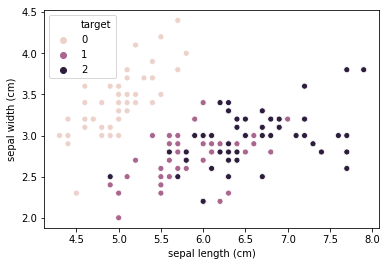

In [11]:
sns.scatterplot("sepal length (cm)","sepal width (cm)" ,data = df,hue = "target")

In [17]:
df["target"] = data.target

In [19]:
df["flower"] = df["target"].apply(lambda x : data.target_names[x])

In [20]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


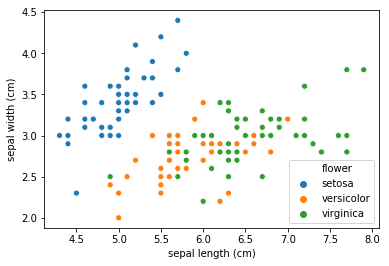

In [21]:
sns.scatterplot("sepal length (cm)","sepal width (cm)" ,data = df,hue = "flower")

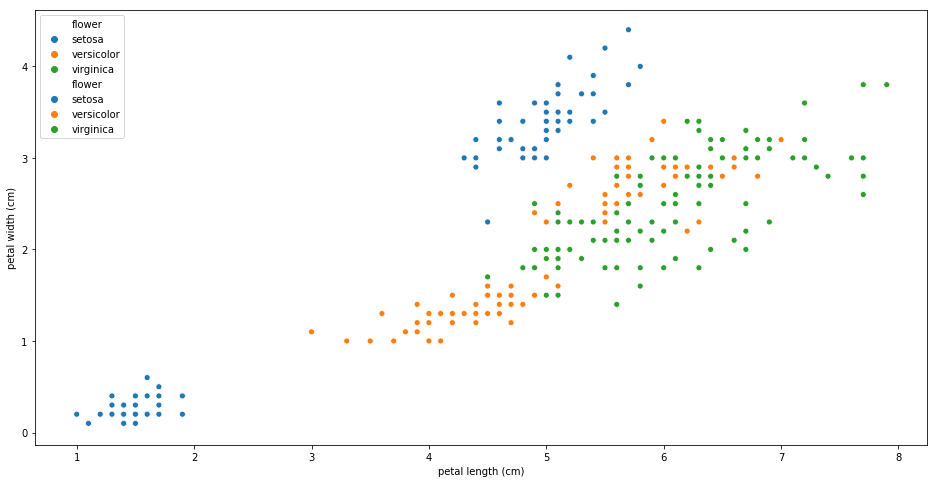

In [23]:
plt.figure(figsize=(16,8))
sns.scatterplot("sepal length (cm)","sepal width (cm)" ,data = df,hue = "flower")
sns.scatterplot("petal length (cm)","petal width (cm)" ,data = df,hue = "flower")

In [24]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["target","flower"],axis = 1), df["target"], test_size=0.33, random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)

C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.98

# tune paremeter

In [36]:
modelc = RandomForestClassifier(n_estimators=10,max_depth = 10)
modelc.fit(X_train,y_train)
modelc.score(X_test,y_test)

0.98